In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/PCD/images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/drive/MyDrive/PCD/images/kunyit/1.jpeg
/content/drive/MyDrive/PCD/images/kunyit/2.jpg
/content/drive/MyDrive/PCD/images/kunyit/3.jpeg
/content/drive/MyDrive/PCD/images/kunyit/4.jpg
/content/drive/MyDrive/PCD/images/kunyit/5.jpg
/content/drive/MyDrive/PCD/images/jahe/1.jpeg
/content/drive/MyDrive/PCD/images/jahe/2.jpeg
/content/drive/MyDrive/PCD/images/jahe/3.jpeg
/content/drive/MyDrive/PCD/images/jahe/4.jpeg
/content/drive/MyDrive/PCD/images/jahe/5.jpg
/content/drive/MyDrive/PCD/images/lengkuas/1.jpg
/content/drive/MyDrive/PCD/images/lengkuas/2.jpg
/content/drive/MyDrive/PCD/images/lengkuas/3.jpg
/content/drive/MyDrive/PCD/images/lengkuas/4.jpg
/content/drive/MyDrive/PCD/images/lengkuas/5.jpg
/content/drive/MyDrive/PCD/images/kencur/1.jpg
/content/drive/MyDrive/PCD/images/kencur/2.jpeg
/content/drive/MyDrive/PCD/images/kencur/3.jpg
/content/drive/MyDrive/PCD/images/kencur/4.jpg
/content/drive/MyDrive/PCD/images/kencur/5.jpeg


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import pathlib

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Dropout, Flatten,Activation, BatchNormalization,MaxPooling2D
from keras import datasets, layers, models
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.callbacks import EarlyStopping


import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data_dir = pathlib.Path('/content/drive/MyDrive/PCD/images')
print(data_dir)
list(data_dir.glob('*/*'))[:5]

/content/drive/MyDrive/PCD/images


[PosixPath('/content/drive/MyDrive/PCD/images/kunyit/1.jpeg'),
 PosixPath('/content/drive/MyDrive/PCD/images/kunyit/2.jpg'),
 PosixPath('/content/drive/MyDrive/PCD/images/kunyit/3.jpeg'),
 PosixPath('/content/drive/MyDrive/PCD/images/kunyit/4.jpg'),
 PosixPath('/content/drive/MyDrive/PCD/images/kunyit/5.jpg')]

In [6]:
lengkuas = list(data_dir.glob('lengkuas/*'))
lengkuas[:5] #first 5 elements of list lengkuas

[PosixPath('/content/drive/MyDrive/PCD/images/lengkuas/1.jpg'),
 PosixPath('/content/drive/MyDrive/PCD/images/lengkuas/2.jpg'),
 PosixPath('/content/drive/MyDrive/PCD/images/lengkuas/3.jpg'),
 PosixPath('/content/drive/MyDrive/PCD/images/lengkuas/4.jpg'),
 PosixPath('/content/drive/MyDrive/PCD/images/lengkuas/5.jpg')]

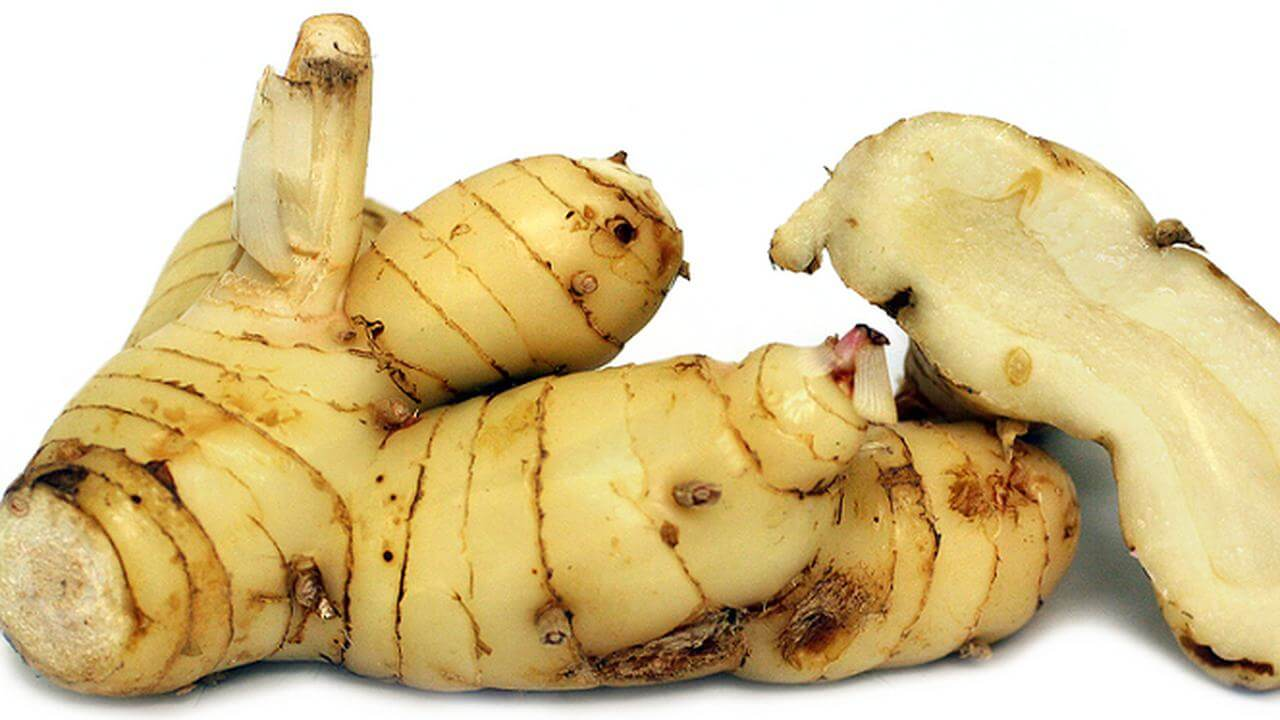

In [8]:
PIL.Image.open(str(lengkuas[4]))

In [9]:
jahe = list(data_dir.glob('jahe/*'))
kencur = list(data_dir.glob('kencur/*'))
kunyit = list(data_dir.glob('kunyit/*'))
lengkuas = list(data_dir.glob('lengkuas/*'))

In [10]:
fruit_images_dict = {
    'jahe': list(data_dir.glob('jahe/*')),
    'kencur': list(data_dir.glob('kencur/*')),
    'kunyit': list(data_dir.glob('kunyit/*')),
    'lengkuas': list(data_dir.glob('lengkuas/*'))
}

fruit_labels_dict = {
    'jahe': 0,
    'kencur': 1,
    'kunyit': 2,
    'lengkuas': 3
}

In [11]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_CHANNELS = 3
X, Y = [], []

for fruit_name, images in fruit_images_dict.items():
    print(fruit_name)
    for image in images:
        img = cv2.imread(str(image))
        if isinstance(img,type(None)):
            #print('image not found')
            continue

        elif ((img.shape[0] >= IMAGE_HEIGHT) and  (img.shape[1] >=IMAGE_WIDTH)):
            resized_img = cv2.resize(img,(IMAGE_WIDTH,IMAGE_HEIGHT))
            X.append(resized_img)
            Y.append(fruit_labels_dict[fruit_name])
        else:
            #print("Invalid Image")
            continue

jahe
kencur
kunyit
lengkuas


In [12]:
X = np.array(X)
Y = np.array(Y)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.1)
print(len(X_train),len(Y_train))
print(len(X_test),len(Y_test))

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

18 18
2 2
(18, 128, 128, 3) (18,)
(2, 128, 128, 3) (2,)


In [14]:
IMAGE_CHANNELS=3
model = Sequential([

Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Conv2D(64, (3, 3), activation='relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Conv2D(128, (3, 3), activation='relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Flatten(),
Dense(512, activation='relu'),
BatchNormalization(),
Dropout(0.5),
Dense(1, activation='softmax'),
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        2

In [15]:
history=model.fit(X_train, Y_train, epochs=45)

Epoch 1/45


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


1/1 [==============================] - 4s 4s/step - loss: 0.0000e+00 - accuracy: 0.2778
Epoch 2/45
1/1 [==============================] - 1s 866ms/step - loss: 0.0000e+00 - accuracy: 0.2778
Epoch 3/45
1/1 [==============================] - 1s 844ms/step - loss: 0.0000e+00 - accuracy: 0.2778
Epoch 4/45
1/1 [==============================] - 1s 845ms/step - loss: 0.0000e+00 - accuracy: 0.2778
Epoch 5/45
1/1 [==============================] - 1s 848ms/step - loss: 0.0000e+00 - accuracy: 0.2778
Epoch 6/45
1/1 [==============================] - 1s 838ms/step - loss: 0.0000e+00 - accuracy: 0.2778
Epoch 7/45
1/1 [==============================] - 1s 811ms/step - loss: 0.0000e+00 - accuracy: 0.2778
Epoch 8/45
1/1 [==============================] - 1s 813ms/step - loss: 0.0000e+00 - accuracy: 0.2778
Epoch 9/45
1/1 [==============================] - 1s 819ms/step - loss: 0.0000e+00 - accuracy: 0.2778
Epoch 10/45
1/1 [==============================] - 1s 851ms/step - loss: 0.0000e+00 - accuracy: 

In [16]:
model.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 285ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [17]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = model.predict(X_test)
y_pred_classes = [0 if element < 0.5 else 1 for element in y_pred]

print("Classification Report: \n", classification_report(Y_test, y_pred_classes, zero_division=0))

1/1 [==============================] - 0s 183ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



1/1 [==============================] - 0s 302ms/step
[[1.]]
kelas: 1 nama= kencur


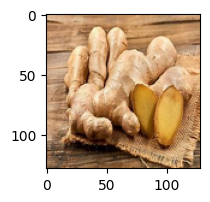

In [21]:
classes = ["jahe","kencur","kunyit","lengkuas"]
from PIL import Image
fileImage = Image.open("/content/drive/MyDrive/PCD/images/jahe/1.jpeg").convert("RGB").resize([IMAGE_WIDTH,IMAGE_HEIGHT],Image.LANCZOS)
image = np.array(fileImage)
myimage = image.reshape(1, IMAGE_WIDTH,IMAGE_HEIGHT,3)
# prepare pixel data
#myimage = myimage.astype('float32')
#myimage = myimage/255.
plt.figure(figsize = (4,2))
plt.imshow(image)

my_predicted_image = model.predict(myimage)
print(my_predicted_image)
if (my_predicted_image < 0.40):
    y_class=0
else:
    y_class=1
print("kelas:",y_class,"nama=",classes[y_class])

In [23]:
model.save("/content/drive/MyDrive/PCD/model_bumbu.h5")